In [2]:
#loading required libraries
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import warnings
warnings.filterwarnings(action='ignore')

C:\Users\nishtha\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#loading the data
transcations_df= pd.read_excel(r"C:/MachineLearning/KPMG/KPMG_VI_New_raw_data_update_final.xlsx", 
                    sheet_name='Transactions')

In [4]:
transcations_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [5]:
#loading the data
newcustomer_df= pd.read_excel(r"C:/MachineLearning/KPMG/KPMG_VI_New_raw_data_update_final.xlsx", 
                    sheet_name='NewCustomerList')

In [6]:
newcustomer_df.head(2)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.43,0.5375,0.671875,0.571094,1,1,1.71875
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.53,0.5300,0.662500,0.563125,1,1,1.71875


In [7]:
#loading the data
customerdemographic_df= pd.read_excel(r"C:/MachineLearning/KPMG/KPMG_VI_New_raw_data_update_final.xlsx", 
                    sheet_name='CustomerDemographic')

In [8]:
customerdemographic_df.head(2)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0


In [9]:
customerdemographic_df.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

In [10]:
#loading the data
CustomerAddress_df= pd.read_excel(r"C:/MachineLearning/KPMG/KPMG_VI_New_raw_data_update_final.xlsx", 
                    sheet_name='CustomerAddress')

In [11]:
CustomerAddress_df.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [12]:
transcations_df.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [13]:
#newcustomer_df.isnull().sum()

In [14]:
customerdemographic_df.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [15]:
CustomerAddress_df.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [16]:
mergedata=transcations_df.merge(customerdemographic_df,
                                left_on = 'customer_id',
                                right_on = 'customer_id',
                                how = 'left')

In [17]:
mergedata.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Male,19.0,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Female,89.0,1979-02-04,Clinical Specialist,Health,Mass Customer,N,ZÌ®ÌÍÌ ÍÍAÌ¥ÌÌÍÌ»ÌLÌ£ÍÍÌ¯Ì¹ÌÍGÌ»OÌ­ÌÌ®,Yes,10.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,Male,9.0,1977-06-03,Desktop Support Technician,Retail,Affluent Customer,N,testâ testâ«,No,22.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,Male,83.0,1962-01-14,Staff Scientist,Financial Services,Mass Customer,N,â°â´âµâââ,No,16.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,Female,29.0,1996-12-15,NaN,Retail,Affluent Customer,N,Ì¡ÍÍÌIÍÌÌÌ¦nÍÍÍvÌ®Ì«okÌ²Ì«ÌÍiÌÍÌ­Ì¹Ì ÌnÌ¡Ì»Ì®Ì...,Yes,2.0


In [18]:
mergedata.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

In [19]:
rfm_df=mergedata[['product_id', 'customer_id', 'transaction_date','list_price','standard_cost']]

In [20]:
rfm_df

,product_id,customer_id,transaction_date,list_price,standard_cost
0,2,2950,2017-02-25,71.49,53.62
1,3,3120,2017-05-21,2091.47,388.92
2,37,402,2017-10-16,1793.43,248.82
3,88,3135,2017-08-31,1198.46,381.10
4,78,787,2017-10-01,1765.30,709.48
...,...,...,...,...,...
19995,51,1018,2017-06-24,2005.66,1203.40
19996,41,127,2017-11-09,416.98,312.74
19997,87,2284,2017-04-14,1636.90,44.71
19998,6,2764,2017-07-03,227.88,136.73


In [21]:
Present=rfm_df['transaction_date'].max()

In [22]:
Present

Timestamp('2017-12-30 00:00:00')

In [23]:
rfm_df['profit']=rfm_df['list_price']-rfm_df['standard_cost']

In [24]:
rfm=rfm_df.groupby('customer_id').agg({'transaction_date': lambda date: round((Present - date.max()).days),
                                  'product_id': lambda num: len(num),
                                  'profit': lambda price: round(price.sum(), 4)})

In [25]:
rfm

,transaction_date,product_id,profit
customer_id,,,
1,7,11,3018.090
2,128,3,2226.260
3,102,8,3362.810
4,195,2,220.570
5,16,6,2394.940
...,...,...,...
3497,52,3,1648.320
3498,127,6,3147.330
3499,51,7,4955.250


In [26]:
rfm.columns=['recency','frequency','monetary']

In [27]:
rfm

,recency,frequency,monetary
customer_id,,,
1,7,11,3018.090
2,128,3,2226.260
3,102,8,3362.810
4,195,2,220.570
5,16,6,2394.940
...,...,...,...
3497,52,3,1648.320
3498,127,6,3147.330
3499,51,7,4955.250


In [28]:
rfm['r_quartile'] = pd.qcut(rfm['recency'].rank(method='first'), 4, ['4', '3', '2', '1'])

In [29]:
rfm['m_quartile'] = pd.qcut(rfm['monetary'].rank(method='first'), 4, ['1', '2', '3', '4'])

In [30]:
rfm['f_quartile'] = pd.qcut(rfm['frequency'].rank(method='first'), 4, ['1', '2', '3', '4'])

In [31]:
rfm.describe()

,recency,frequency,monetary
count,3494.000000,3494.000000,3494.000000
mean,60.813681,5.724098,3128.301078
std,57.787120,2.325873,1770.536034
min,0.000000,1.000000,15.080000
25%,17.000000,4.000000,1841.370000
50%,44.000000,6.000000,2861.980000
75%,85.000000,7.000000,4183.107500
max,353.000000,14.000000,11668.950000


In [32]:
rfm

,recency,frequency,monetary,r_quartile,m_quartile,f_quartile
customer_id,,,,,,
1,7,11,3018.090,4,3,4
2,128,3,2226.260,1,2,1
3,102,8,3362.810,1,3,4
4,195,2,220.570,1,1,1
5,16,6,2394.940,4,2,2
...,...,...,...,...,...,...
3497,52,3,1648.320,2,1,1
3498,127,6,3147.330,1,3,3
3499,51,7,4955.250,2,4,4


In [33]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str) + rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,recency,frequency,monetary,r_quartile,m_quartile,f_quartile,RFM_Score
customer_id,,,,,,,
1,7,11,3018.09,4,3,4,443
2,128,3,2226.26,1,2,1,112
3,102,8,3362.81,1,3,4,143
4,195,2,220.57,1,1,1,111
5,16,6,2394.94,4,2,2,422


In [34]:
# Filter out Top/Best cusotmers
rfm[rfm['RFM_Score']=='444'].sort_values('monetary',ascending=False)

,recency,frequency,monetary,r_quartile,m_quartile,f_quartile,RFM_Score
customer_id,,,,,,,
1460,12,8,10787.60,4,4,4,444
1558,8,9,10640.30,4,4,4,444
729,1,10,10497.78,4,4,4,444
322,1,12,10341.57,4,4,4,444
3232,8,13,8903.62,4,4,4,444
...,...,...,...,...,...,...,...
377,6,13,4276.97,4,4,4,444
2130,1,8,4253.77,4,4,4,444
577,2,11,4242.34,4,4,4,444


In [35]:
# Filter out Top/Best cusotmers
rfm[rfm['RFM_Score']=='111'].sort_values('monetary',ascending=False)

,recency,frequency,monetary,r_quartile,m_quartile,f_quartile,RFM_Score
customer_id,,,,,,,
2959,134,3,1835.26,1,1,1,111
1768,92,2,1821.07,1,1,1,111
170,100,4,1820.81,1,1,1,111
1209,131,2,1809.69,1,1,1,111
3457,97,3,1802.90,1,1,1,111
...,...,...,...,...,...,...,...
872,171,1,75.48,1,1,1,111
3272,295,1,41.13,1,1,1,111
922,188,2,41.13,1,1,1,111


In [36]:
#Filter the scores and segment customers
print("Best Customers: ",len(rfm[rfm['RFM_Score']=='444']))
print('Loyal Customers: ',len(rfm[rfm['f_quartile']>='3']))
print("Big Spenders: ",len(rfm[rfm['m_quartile']=='4']))
print('Almost Lost: ', len(rfm[rfm['RFM_Score']=='111']))

Best Customers:  184
Loyal Customers:  1747
Big Spenders:  874
Almost Lost:  270


### Visualization

In [37]:
rfm.head()

,recency,frequency,monetary,r_quartile,m_quartile,f_quartile,RFM_Score
customer_id,,,,,,,
1,7,11,3018.09,4,3,4,443
2,128,3,2226.26,1,2,1,112
3,102,8,3362.81,1,3,4,143
4,195,2,220.57,1,1,1,111
5,16,6,2394.94,4,2,2,422


In [38]:
rfm=rfm.reset_index()

In [39]:
rfm

,customer_id,recency,frequency,monetary,r_quartile,m_quartile,f_quartile,RFM_Score
0,1,7,11,3018.090,4,3,4,443
1,2,128,3,2226.260,1,2,1,112
2,3,102,8,3362.810,1,3,4,143
3,4,195,2,220.570,1,1,1,111
4,5,16,6,2394.940,4,2,2,422
...,...,...,...,...,...,...,...,...
3489,3497,52,3,1648.320,2,1,1,211
3490,3498,127,6,3147.330,1,3,3,133
3491,3499,51,7,4955.250,2,4,4,244
3492,3500,144,6,1785.860,1,1,3,131


In [40]:
rfm_merge=rfm.merge(mergedata,
                    left_on = 'customer_id',
                    right_on = 'customer_id',
                    how = 'left')

In [41]:
rfm_merge

,customer_id,recency,frequency,monetary,r_quartile,m_quartile,f_quartile,RFM_Score,transaction_id,product_id,...,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,7,11,3018.090,4,3,4,443,94,86,...,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,1,7,11,3018.090,4,3,4,443,3765,38,...,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
2,1,7,11,3018.090,4,3,4,443,5157,47,...,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
3,1,7,11,3018.090,4,3,4,443,9785,72,...,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
4,1,7,11,3018.090,4,3,4,443,13424,2,...,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3500,144,6,1785.860,1,1,3,131,14870,22,...,Female,71.0,1967-07-21,NaN,Entertainment,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,No,17.0
19996,3500,144,6,1785.860,1,1,3,131,19836,40,...,Female,71.0,1967-07-21,NaN,Entertainment,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,No,17.0
19997,5034,84,3,269.485,2,1,1,211,8708,0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19998,5034,84,3,269.485,2,1,1,211,16701,0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
rfm_merge['transaction_date'].min()

Timestamp('2017-01-01 00:00:00')

In [43]:
d=rfm_merge.duplicated(subset=None, keep='last')

In [44]:
d.value_counts()

False    20000
dtype: int64

In [45]:
rfm_merge.columns

Index(['customer_id', 'recency', 'frequency', 'monetary', 'r_quartile',
       'm_quartile', 'f_quartile', 'RFM_Score', 'transaction_id', 'product_id',
       'transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'first_name', 'last_name',
       'gender', 'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

In [46]:
rfm_data=rfm_merge[['customer_id', 'recency', 'frequency', 'monetary', 'r_quartile',
       'm_quartile', 'f_quartile', 'RFM_Score', 'transaction_id', 'product_id',
       'transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size','gender', 'past_3_years_bike_related_purchases', 
                    'DOB', 'job_title','job_industry_category', 'wealth_segment', 'owns_car', 'tenure' ]]

In [47]:
rfm_data

,customer_id,recency,frequency,monetary,r_quartile,m_quartile,f_quartile,RFM_Score,transaction_id,product_id,...,product_class,product_size,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure
0,1,7,11,3018.090,4,3,4,443,94,86,...,medium,medium,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0
1,1,7,11,3018.090,4,3,4,443,3765,38,...,medium,medium,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0
2,1,7,11,3018.090,4,3,4,443,5157,47,...,low,small,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0
3,1,7,11,3018.090,4,3,4,443,9785,72,...,medium,medium,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0
4,1,7,11,3018.090,4,3,4,443,13424,2,...,medium,medium,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3500,144,6,1785.860,1,1,3,131,14870,22,...,medium,medium,Female,71.0,1967-07-21,NaN,Entertainment,Affluent Customer,No,17.0
19996,3500,144,6,1785.860,1,1,3,131,19836,40,...,high,medium,Female,71.0,1967-07-21,NaN,Entertainment,Affluent Customer,No,17.0
19997,5034,84,3,269.485,2,1,1,211,8708,0,...,medium,medium,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
19998,5034,84,3,269.485,2,1,1,211,16701,0,...,medium,medium,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [48]:
PRESENT = dt.datetime(2020,8,26)

In [49]:
PRESENT

datetime.datetime(2020, 8, 26, 0, 0)

In [50]:
rfm_data['age']=PRESENT-rfm_data['DOB']

In [51]:
rfm_data['age']=rfm_data['age']/365

In [52]:
rfm_data

,customer_id,recency,frequency,monetary,r_quartile,m_quartile,f_quartile,RFM_Score,transaction_id,product_id,...,product_size,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,age
0,1,7,11,3018.090,4,3,4,443,94,86,...,medium,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,66 days 22:01:38.630136
1,1,7,11,3018.090,4,3,4,443,3765,38,...,medium,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,66 days 22:01:38.630136
2,1,7,11,3018.090,4,3,4,443,5157,47,...,small,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,66 days 22:01:38.630136
3,1,7,11,3018.090,4,3,4,443,9785,72,...,medium,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,66 days 22:01:38.630136
4,1,7,11,3018.090,4,3,4,443,13424,2,...,medium,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,66 days 22:01:38.630136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3500,144,6,1785.860,1,1,3,131,14870,22,...,medium,Female,71.0,1967-07-21,NaN,Entertainment,Affluent Customer,No,17.0,53 days 03:17:15.616438
19996,3500,144,6,1785.860,1,1,3,131,19836,40,...,medium,Female,71.0,1967-07-21,NaN,Entertainment,Affluent Customer,No,17.0,53 days 03:17:15.616438
19997,5034,84,3,269.485,2,1,1,211,8708,0,...,medium,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT
19998,5034,84,3,269.485,2,1,1,211,16701,0,...,medium,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT


In [53]:
now = dt.datetime.now()

In [54]:
rfm_data['age']=(now.year - rfm_data['DOB'].dt.year) - ((now.month - rfm_data['DOB'].dt.month) < 0)

In [55]:
rfm_data

,customer_id,recency,frequency,monetary,r_quartile,m_quartile,f_quartile,RFM_Score,transaction_id,product_id,...,product_size,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,age
0,1,7,11,3018.090,4,3,4,443,94,86,...,medium,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,67.0
1,1,7,11,3018.090,4,3,4,443,3765,38,...,medium,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,67.0
2,1,7,11,3018.090,4,3,4,443,5157,47,...,small,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,67.0
3,1,7,11,3018.090,4,3,4,443,9785,72,...,medium,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,67.0
4,1,7,11,3018.090,4,3,4,443,13424,2,...,medium,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3500,144,6,1785.860,1,1,3,131,14870,22,...,medium,Female,71.0,1967-07-21,NaN,Entertainment,Affluent Customer,No,17.0,53.0
19996,3500,144,6,1785.860,1,1,3,131,19836,40,...,medium,Female,71.0,1967-07-21,NaN,Entertainment,Affluent Customer,No,17.0,53.0
19997,5034,84,3,269.485,2,1,1,211,8708,0,...,medium,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
19998,5034,84,3,269.485,2,1,1,211,16701,0,...,medium,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
rfm_data.isnull().sum()

customer_id                               0
recency                                   0
frequency                                 0
monetary                                  0
r_quartile                                0
m_quartile                                0
f_quartile                                0
RFM_Score                                 0
transaction_id                            0
product_id                                0
transaction_date                          0
online_order                            360
order_status                              0
brand                                   197
product_line                            197
product_class                           197
product_size                            197
gender                                    3
past_3_years_bike_related_purchases       3
DOB                                     449
job_title                              2397
job_industry_category                  3232
wealth_segment                  

In [57]:
rfm_data['gender'].value_counts()

Female    9993
Male      9525
U          455
F           11
Femal        7
M            6
Name: gender, dtype: int64

In [58]:
rfm_data['gender'].replace({"F":"Female", "M":"Male", "Femal":"Female", "U":"Unknown"}, inplace=True)

In [59]:
rfm_data['gender'].value_counts()

Female     10011
Male        9531
Unknown      455
Name: gender, dtype: int64

In [60]:
rfm_data['age'].describe()

count    19551.000000
mean        43.086185
std         12.931027
min         18.000000
25%         33.000000
50%         43.000000
75%         52.000000
max        177.000000
Name: age, dtype: float64

In [61]:
rfm_data[rfm_data['age']>100]

,customer_id,recency,frequency,monetary,r_quartile,m_quartile,f_quartile,RFM_Score,transaction_id,product_id,...,product_size,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,age
200,34,102,9,4825.59,1,4,4,144,1039,8,...,small,Unknown,59.0,1843-12-21,Legal Assistant,IT,Affluent Customer,No,20.0,177.0
201,34,102,9,4825.59,1,4,4,144,1107,15,...,medium,Unknown,59.0,1843-12-21,Legal Assistant,IT,Affluent Customer,No,20.0,177.0
202,34,102,9,4825.59,1,4,4,144,2638,83,...,large,Unknown,59.0,1843-12-21,Legal Assistant,IT,Affluent Customer,No,20.0,177.0
203,34,102,9,4825.59,1,4,4,144,9044,12,...,medium,Unknown,59.0,1843-12-21,Legal Assistant,IT,Affluent Customer,No,20.0,177.0
204,34,102,9,4825.59,1,4,4,144,9792,60,...,small,Unknown,59.0,1843-12-21,Legal Assistant,IT,Affluent Customer,No,20.0,177.0
205,34,102,9,4825.59,1,4,4,144,12083,13,...,medium,Unknown,59.0,1843-12-21,Legal Assistant,IT,Affluent Customer,No,20.0,177.0
206,34,102,9,4825.59,1,4,4,144,16935,0,...,NaN,Unknown,59.0,1843-12-21,Legal Assistant,IT,Affluent Customer,No,20.0,177.0
207,34,102,9,4825.59,1,4,4,144,17808,96,...,small,Unknown,59.0,1843-12-21,Legal Assistant,IT,Affluent Customer,No,20.0,177.0
208,34,102,9,4825.59,1,4,4,144,19291,65,...,medium,Unknown,59.0,1843-12-21,Legal Assistant,IT,Affluent Customer,No,20.0,177.0


In [62]:
rfm_data['age']=rfm_data['age'].fillna(rfm_data['age'].median())

In [63]:
rfm_data['age'].describe()

count    20000.000000
mean        43.084250
std         12.785051
min         18.000000
25%         34.000000
50%         43.000000
75%         52.000000
max        177.000000
Name: age, dtype: float64

In [64]:
rfm_data['tenure'].describe()

count    19551.000000
mean        10.683239
std          5.676403
min          1.000000
25%          6.000000
50%         11.000000
75%         15.000000
max         22.000000
Name: tenure, dtype: float64

In [65]:
rfm_data.isnull().sum()

customer_id                               0
recency                                   0
frequency                                 0
monetary                                  0
r_quartile                                0
m_quartile                                0
f_quartile                                0
RFM_Score                                 0
transaction_id                            0
product_id                                0
transaction_date                          0
online_order                            360
order_status                              0
brand                                   197
product_line                            197
product_class                           197
product_size                            197
gender                                    3
past_3_years_bike_related_purchases       3
DOB                                     449
job_title                              2397
job_industry_category                  3232
wealth_segment                  

In [66]:
rfm_data=rfm_data.drop(['DOB'], axis=1)

In [67]:
rfm_data = rfm_data.dropna(axis=0, subset=['tenure'])

In [68]:
rfm_data.isnull().sum()

customer_id                               0
recency                                   0
frequency                                 0
monetary                                  0
r_quartile                                0
m_quartile                                0
f_quartile                                0
RFM_Score                                 0
transaction_id                            0
product_id                                0
transaction_date                          0
online_order                            352
order_status                              0
brand                                   189
product_line                            189
product_class                           189
product_size                            189
gender                                    0
past_3_years_bike_related_purchases       0
job_title                              2355
job_industry_category                  3229
wealth_segment                            0
owns_car                        

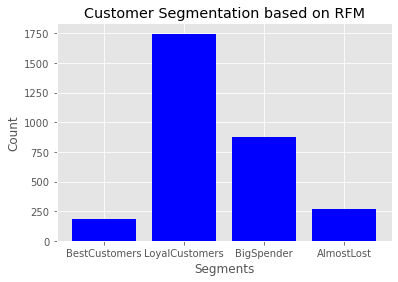

In [69]:
%matplotlib inline
plt.style.use('ggplot')

segments = ['BestCustomers', 'LoyalCustomers', 'BigSpender', 'AlmostLost']
counts = [184, 1747, 874, 270]

x_pos = [i for i, _ in enumerate(segments)]

plt.bar(x_pos, counts, color='blue')
plt.xlabel("Segments")
plt.ylabel("Count")
plt.title("Customer Segmentation based on RFM")

plt.xticks(x_pos, segments)

plt.show()

In [70]:
rfm_data['age_group'] = pd.cut(x=rfm_data['age'], bins=[18, 30, 55, 85], labels=['Young-Adults', 'Mid-Aged', 'Senior-Citizens'])

In [71]:
rfm_data

,customer_id,recency,frequency,monetary,r_quartile,m_quartile,f_quartile,RFM_Score,transaction_id,product_id,...,product_size,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,age,age_group
0,1,7,11,3018.09,4,3,4,443,94,86,...,medium,Female,93.0,Executive Secretary,Health,Mass Customer,Yes,11.0,67.0,Senior-Citizens
1,1,7,11,3018.09,4,3,4,443,3765,38,...,medium,Female,93.0,Executive Secretary,Health,Mass Customer,Yes,11.0,67.0,Senior-Citizens
2,1,7,11,3018.09,4,3,4,443,5157,47,...,small,Female,93.0,Executive Secretary,Health,Mass Customer,Yes,11.0,67.0,Senior-Citizens
3,1,7,11,3018.09,4,3,4,443,9785,72,...,medium,Female,93.0,Executive Secretary,Health,Mass Customer,Yes,11.0,67.0,Senior-Citizens
4,1,7,11,3018.09,4,3,4,443,13424,2,...,medium,Female,93.0,Executive Secretary,Health,Mass Customer,Yes,11.0,67.0,Senior-Citizens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19992,3500,144,6,1785.86,1,1,3,131,6309,69,...,medium,Female,71.0,NaN,Entertainment,Affluent Customer,No,17.0,53.0,Mid-Aged
19993,3500,144,6,1785.86,1,1,3,131,8416,74,...,medium,Female,71.0,NaN,Entertainment,Affluent Customer,No,17.0,53.0,Mid-Aged
19994,3500,144,6,1785.86,1,1,3,131,8562,33,...,small,Female,71.0,NaN,Entertainment,Affluent Customer,No,17.0,53.0,Mid-Aged
19995,3500,144,6,1785.86,1,1,3,131,14870,22,...,medium,Female,71.0,NaN,Entertainment,Affluent Customer,No,17.0,53.0,Mid-Aged


In [72]:
rfm_data['age_group'].value_counts()

Mid-Aged           11960
Senior-Citizens     3816
Young-Adults        3751
Name: age_group, dtype: int64

In [73]:
unique_rfm_data=rfm_data.drop_duplicates(subset ="customer_id")

In [74]:
unique_rfm_data.to_csv(r'C:\MachineLearning\KPMG\rfm_data.csv')

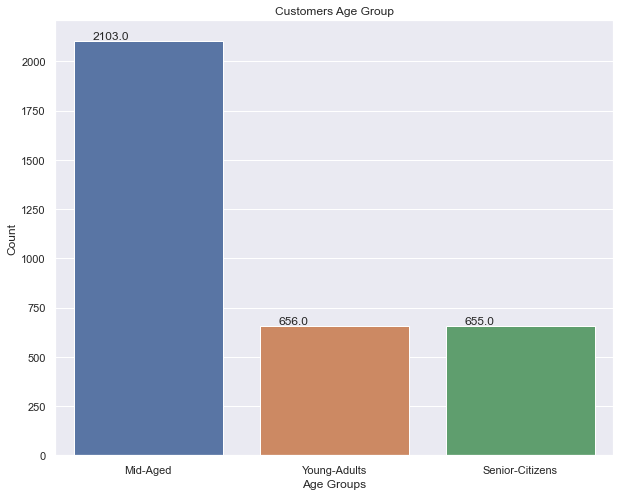

In [75]:
sns.set(style='darkgrid')
plt.figure(figsize=(10,8))
ax = sns.countplot(x=unique_rfm_data['age_group'], data=unique_rfm_data, order = unique_rfm_data['age_group'].value_counts().index)
plt.title('Customers Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Count')

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))

In [76]:
unique_rfm_data['gender']

0        Female
11         Male
14         Male
22         Male
24       Female
          ...  
19971      Male
19975    Female
19978    Female
19984      Male
19991    Female
Name: gender, Length: 3417, dtype: object

In [77]:
unique_rfm_data=unique_rfm_data.loc[unique_rfm_data['gender']!='Unknown']

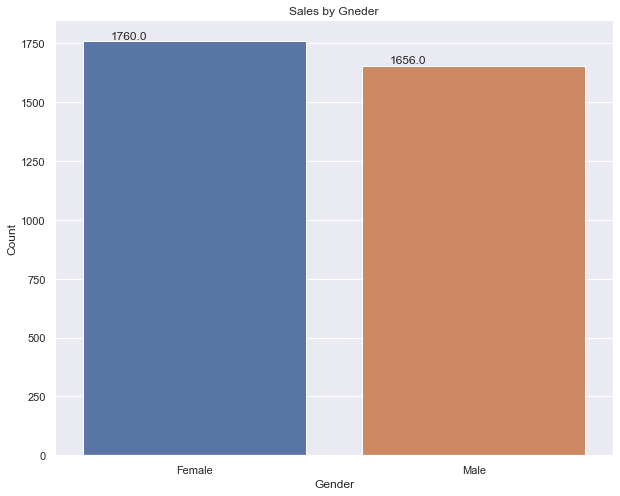

In [78]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x=unique_rfm_data['gender'], data=unique_rfm_data)
plt.title('Sales by Gneder')
plt.xlabel('Gender')
plt.ylabel('Count')

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))

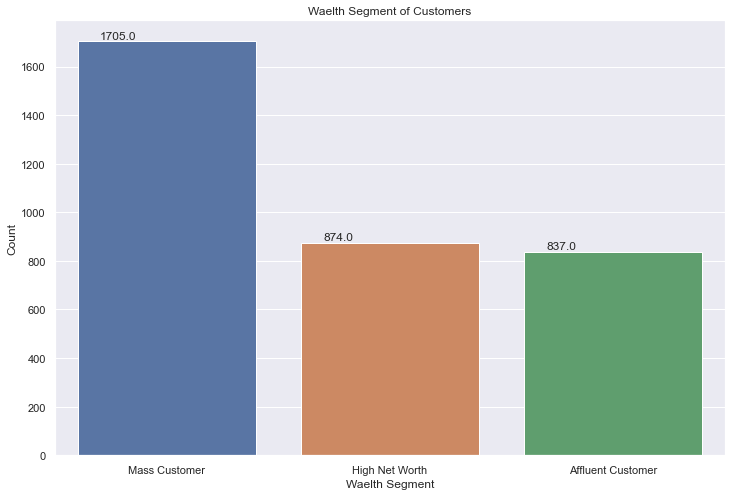

In [79]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x=unique_rfm_data['wealth_segment'], data=unique_rfm_data, order = unique_rfm_data['wealth_segment'].value_counts().index)
plt.title('Waelth Segment of Customers')
plt.xlabel('Waelth Segment')
plt.ylabel('Count')

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))

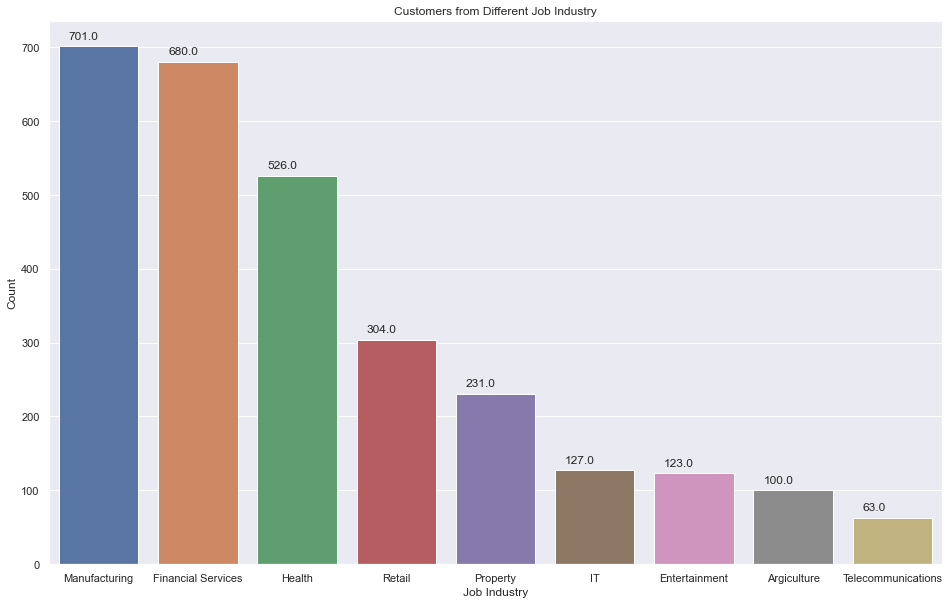

In [80]:
plt.figure(figsize=(16,10))
ax = sns.countplot(x=unique_rfm_data['job_industry_category'], data=unique_rfm_data,
                  order = unique_rfm_data['job_industry_category'].value_counts().index)
plt.title('Customers from Different Job Industry')
plt.xlabel('Job Industry')
plt.ylabel('Count')

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))

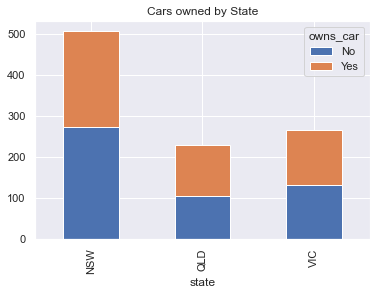

In [81]:

newcustomer_df.groupby(['state','owns_car']).size().unstack().plot(kind='bar',stacked=True)
plt.title('Cars owned by State')
plt.show()